In [75]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

In [53]:
train_data = pd.read_csv('train.csv')
train_data.EJ.value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [54]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Print the columns with missing values
print(missing_values[missing_values > 0])

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64


In [55]:
#Use mean imputer for missing values 

imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(train_data.drop(columns = ['EJ','Id','Class']))
train_data[train_data.drop(columns = ['EJ','Id','Class']).columns] = imputed_data


In [57]:
#Create One Hot Encoding for Categorical Feature EJ
encoded_ej = pd.get_dummies(train_data['EJ'])

#Create X_train using imputed and encoded data
X_train = train_data.drop(columns=['EJ','Class'])
X_train = pd.concat([X_train, encoded_ej],axis=1)

<AxesSubplot: >

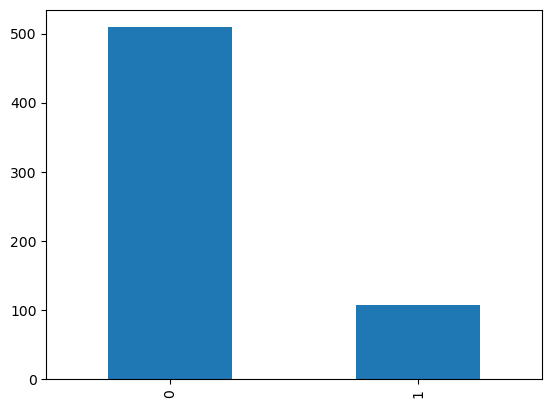

In [70]:
##Check for class imbalance
y_train = train_data.Class
y_train.value_counts().plot.bar()

In [ ]:
#Use random undersampler to undersample class 0
